In [ ]:
import socket
import struct
import pandas as pd

UDP_IP = '192.168.128.17'
UDP_PORT = 61231

CHUNK_SIZE = 1
TOTAL_DATA_SIZE = 50000

sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.bind((UDP_IP, UDP_PORT))

try:
    print(f"Listening on {UDP_IP}:{UDP_PORT}")
    received_data = []
    while len(received_data) < TOTAL_DATA_SIZE:
        data, _ = sock.recvfrom(CHUNK_SIZE * 2)  # Assuming int16_t is 2 bytes each
        # Convert the received bytes to integers
        integers = [int.from_bytes(data[i:i+2], byteorder='little', signed=True) for i in range(0, len(data), 2)]
        received_data.append(integers[0])
        print("received total data: ", len(received_data))
        
finally:
    sock.close()
    print("Socket closed")
    df = pd.DataFrame(received_data, columns=['raw_adc'])
    print(df)

Listening on 192.168.128.17:61231


In [7]:
print(df['raw_adc'])

0        3462
1        8097
2        8190
3        8190
4        8190
         ... 
49995    -178
49996    -175
49997    -168
49998    -172
49999    -172
Name: raw_adc, Length: 50000, dtype: int64


In [8]:
print(df.shape)

(50000, 1)


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = df.iloc[:].values
length_Of_Signal = np.shape(data)[0]
print(length_Of_Signal)

50000


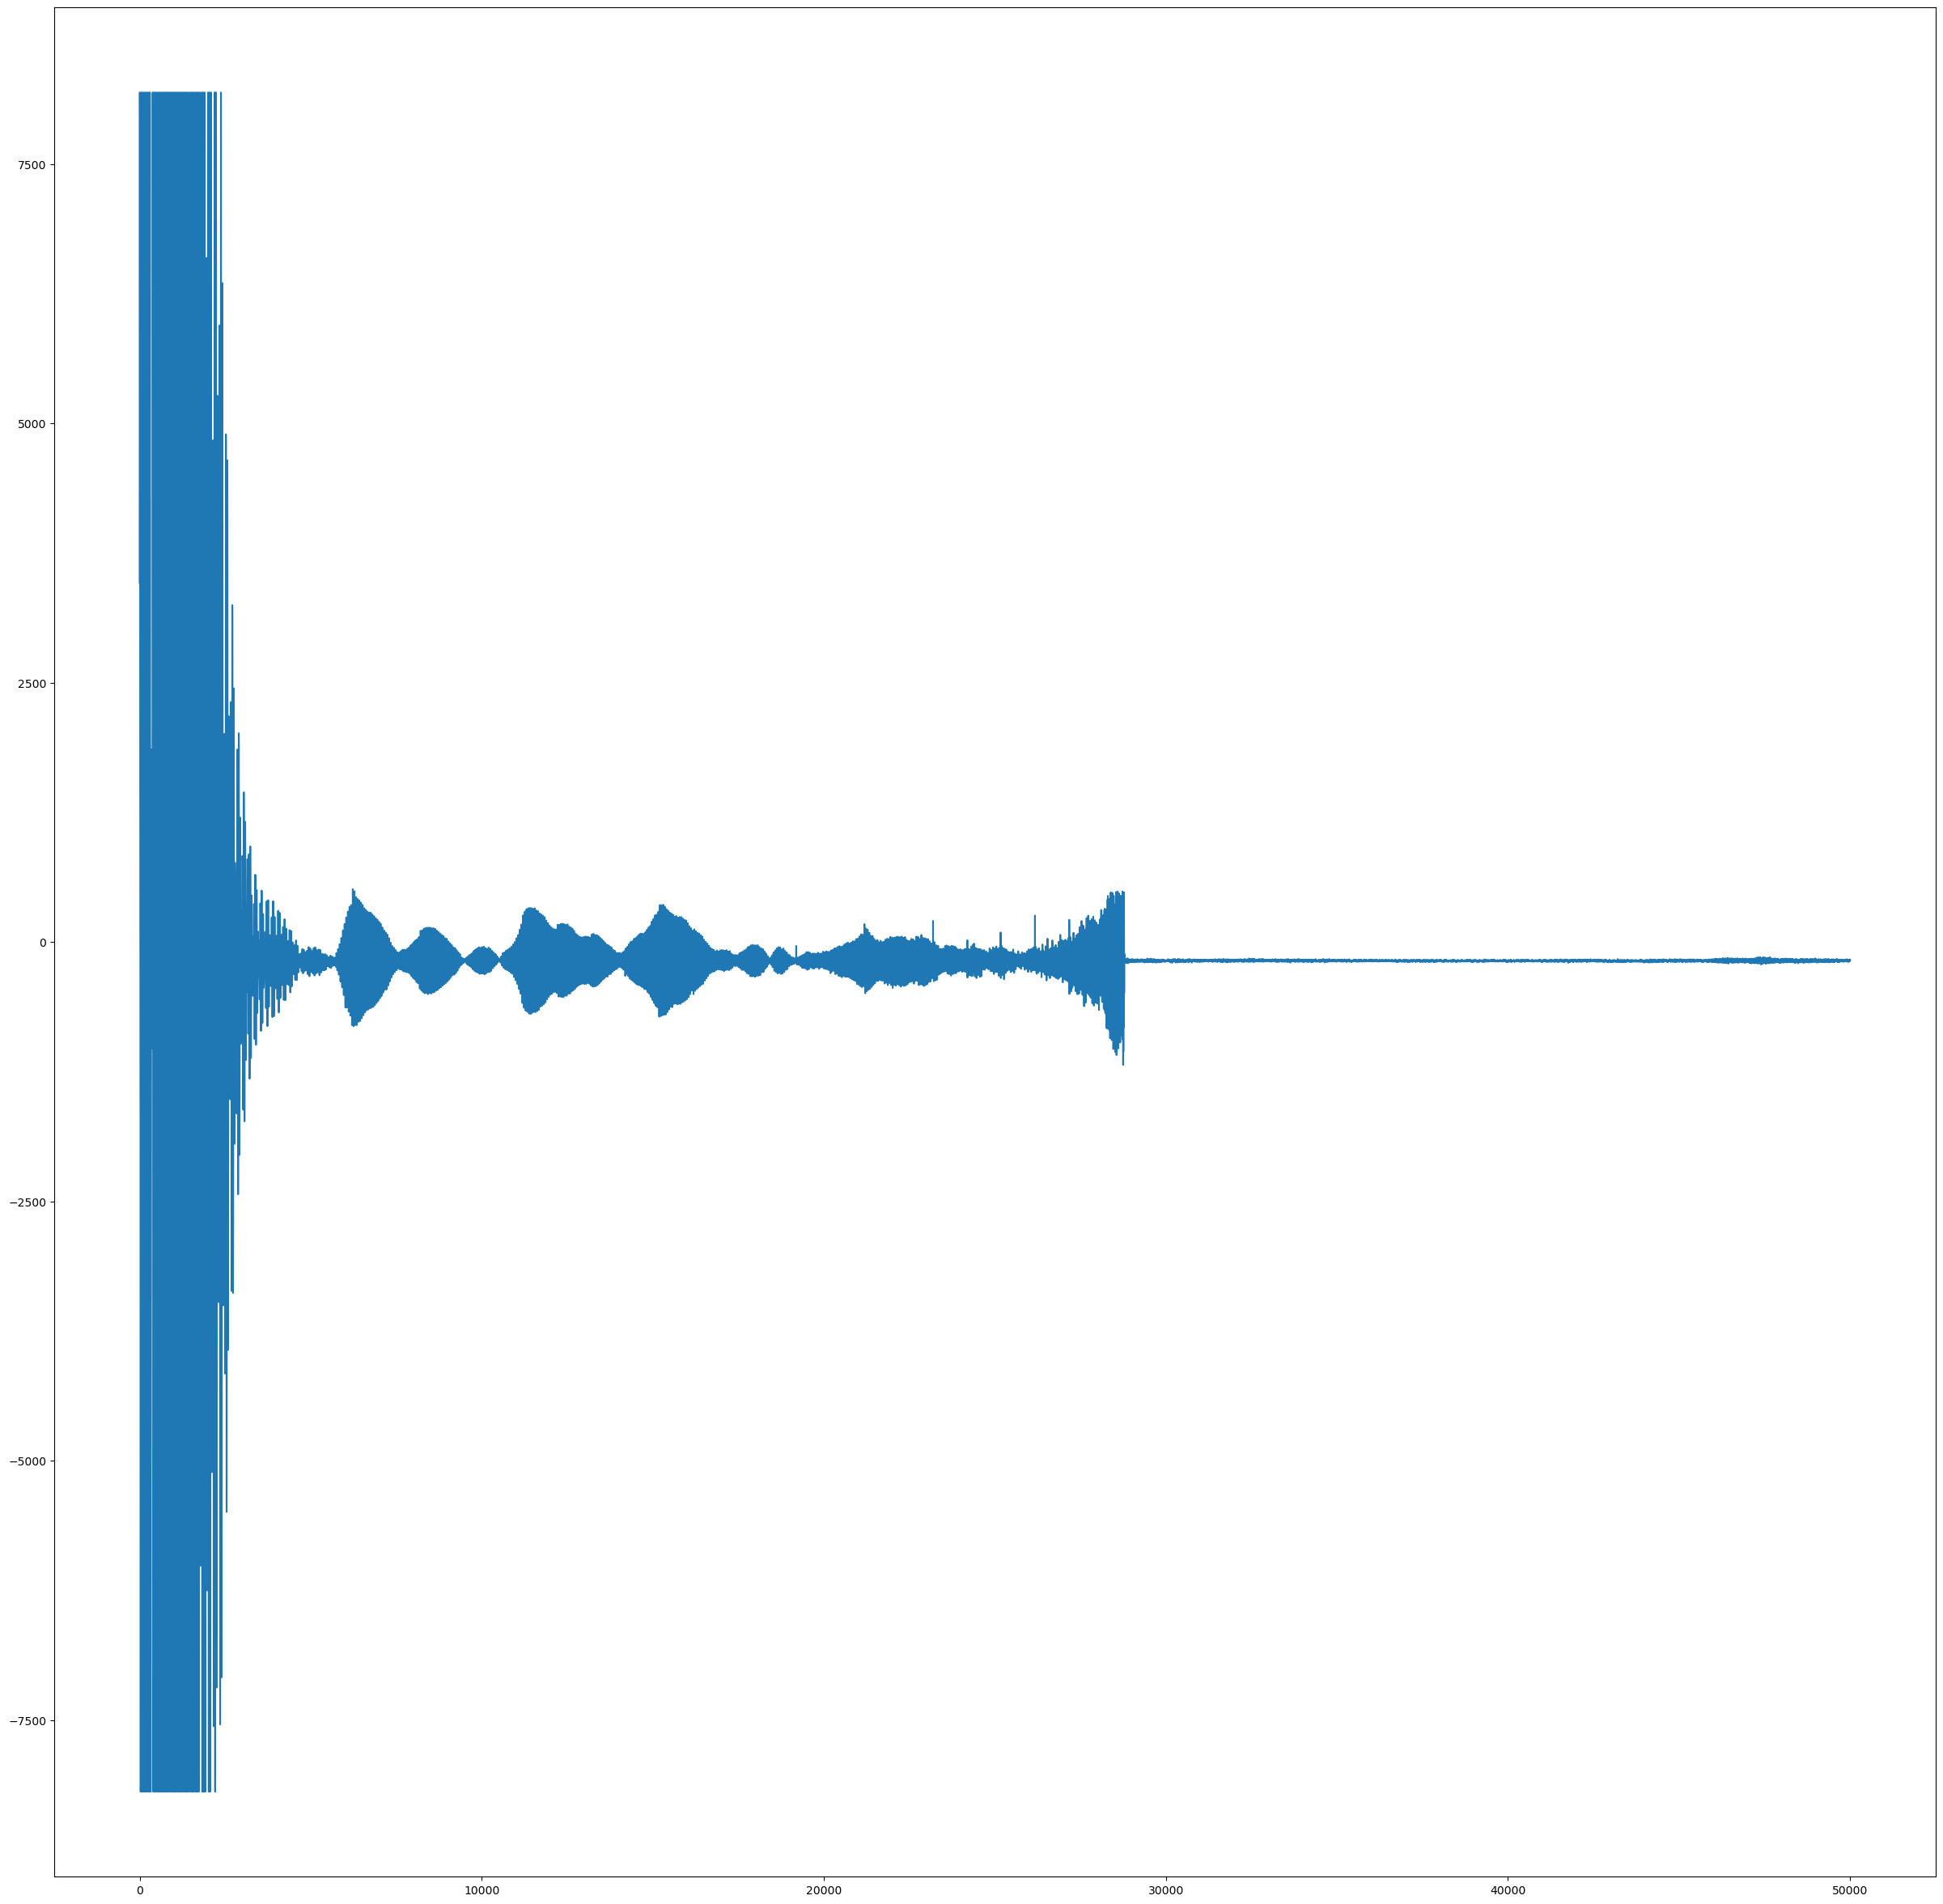

In [10]:
y_plot = data
x_plot = np.arange(length_Of_Signal)
plt.figure(figsize=(30,30)) 
plt.plot(x_plot, y_plot)